# Data Visualization Mini-Lecture!
## 2/2/20
### Made by Kanu Grover

### Table of Contents
* [Data Visualization Tree](#datavisualizationtree)
* [Matplotlib vs. Seaborn](#pltvssns)
* [Lineplots](#lineplots)
    * [Lineplots in Matplotlib](#pltlineplots)
    * [Lineplots in Seaborn](#snslineplots)
    * [Hue in Seaborn](#snshue)
* [Barplots](#barplots)
    * [Barplots in Matplotlib](#matplotlibbarplots)
    * [Barplots in Seaborn](#seabornbarplots)
* [Scatterplots](#scatterplots)
    * [Scatterplots in Matplotlib](#scatterplotsmatplotlib)
    * [Scatterplots in Seaborn](#scatterplotsseaborn)
* [Boxplots/Histograms](#boxplots/histograms)
    * [Boxplots/Histograms in Matplotlib](#boxplots/histograms_matplotlib)
    * [Boxplots/Histograms in Seaborn](#boxplots/histograms_seaborn)

    

In [196]:
# Setup code
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Helps our code look nice!
%matplotlib inline
sns.set()
from IPython.display import display, Latex, Markdown

movies = pd.read_csv('data/train.csv')


<a id='datavisualizationtree'></a>
# Data Visualization Tree

Data types in Python are extremely important because they provide us with a framework for how we can manipulate variables when we clean data. Certain visualization functions and statistical tests only work with certain types of data, so let's identify some of the most common types!

- **Qualitative/Categorical**: Dealing with descriptions or variables that can be observed. You generally can't draw linear correlations from this type of variable (without the use of more advanced techniques).
    - **Nominal**: You can think of nominal variables as unordered labels, with no quantiative value. Changing the order of these makes no difference in the dataset.
        - e.g. Gender, Blood-type, Zipcode
    - **Ordinal**: Ordinal variables, in many ways, are similar to nominal variables. However, the major difference is that they are ordered and follow a chronological structure.
        - e.g. Socio-economic status, Education Level
- **Quantitative/Numeric**: Dealing with numbers that can be measured in tangible numerical units. This type of data is used to determine relationships and correlations between data.
    - **Continuous**: Continuous variables (as their name implies) are variables that can take on a continuous (or infinite) number of values.  
        - e.g. Height, Weight
    - **Discrete**: Discrete variables can only take on fixed values.
        - e.g. Number of dollar bills in my piggy bank, number of heads in 20 coin flips.

<img src="Data_Types.png" width="600px" /> 

Anyways, lets get to the meat of today's lecture! The data we are exploring is collected from a Kaggle database of Movie Box Office Revenue Prediction. We're going to have a little competition here! Using the knowledge we have covered, I want you to make an educated guess which variables demonstrate a strong relationship (or strong predictors) to the revenue totals (last column). Pause this video and try to think about this yourself. Provided below is the dataset - don't try to examine it too closely - theres over 3000 rows! Cast your answers in the cell below!

Its a hard task, but we'll be able to examine how much easier this is with data visualization!

Data visualization is extremeley important in determining relationships between variables. We need to be able to analyze our variables and the correlation they have with the variable in question (in this lecture example: movie revenue). What we learn today is key to understanding relationships between variables (and their different data types), which will ultimately allow us to train data and form machine learning models in more advanced data science.

###### Answer:

In [197]:
# Our dataset
movies.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [198]:
###Ignore this - code to cut our data down

def feature_engineering(df):
    dropped_columns = df.drop(['title', 'id', 'imdb_id', 'homepage', 'spoken_languages', 'original_title', 'overview', 'poster_path', 'Keywords', 'status', 'tagline', 'crew', ], axis=1)
    array = []
    y = dropped_columns['belongs_to_collection'].isnull()
    for i in y:
        if i == False:
            array = np.append(array, 'Yes')
        else:
            array = np.append(array, 'No')
    dropped_columns['belongs_to_collection'] = array
    dropped_columns['runtime'] = dropped_columns['runtime'].fillna(dropped_columns['runtime'].mean())
    dropped_columns['popularity'] = dropped_columns['popularity'].fillna(dropped_columns['popularity'].mean())
    
    dropped_columns['release_month'] = dropped_columns.release_date.str.extract('(\S+)/\S+/\S+', expand=False).astype(np.int16)
    dropped_columns['release_year'] = dropped_columns.release_date.str.extract('\S+/\S+/(\S+)', expand=False).astype(np.int16)
    dropped_columns['release_day'] = dropped_columns.release_date.str.extract('\S+/(\S+)/\S+', expand=False).astype(np.int16)
    dropped_columns.loc[(21 <= dropped_columns['release_year']) & (dropped_columns['release_year'] <= 99), ['release_year']] += 1900
    dropped_columns.loc[dropped_columns.release_year < 21, ['release_year']] += 2000
    
    return dropped_columns
revised_movies = feature_engineering(movies)

In [199]:
def genres(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    str2 = str1.split(",")[1::2]
    return str2
revised_movies['genres'] = revised_movies['genres'].apply(lambda elem: genres(elem))
genres_dict = dict()

for genre in revised_movies["genres"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1

In [200]:
revised_movies.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,cast,revenue,release_month,release_year,release_day
0,Yes,14000000,[Comedy],en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,2,2015,20
1,Yes,40000000,"[Comedy, Drama, Family, Romance]",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,8,2004,6
2,No,3300000,[Drama],en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,10,2014,10
3,No,1200000,"[Thriller, Drama]",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,3,2012,9
4,No,0,"[Action, Thriller]",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,2,2009,5


<a id='pltvssns'></a>
# Matplotlib vs Seaborn




<a id='lineplots'></a>
## Lineplots



<a id='pltlineplots'></a>
### Lineplots in Matplotlib
Lineplots are primarily used to find a relationship between 2 variables on the X and Y axis. They are created using the `plt.plot()` function, which takes in an X and Y argument 

**Tip:** After typing `plt.plot()`, you can press `shift+tab` to see what arguments `plt.plot()` takes in. This is true for many functions. We can see from the arbritary values below:

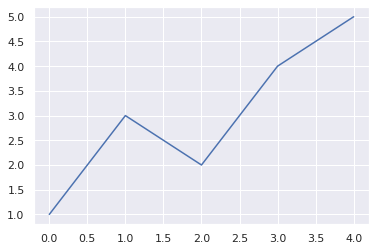

In [5]:
plt.plot([1, 3, 2, 4, 5])

In this case, we only supplied our `plt.plot` function with a list of values - matplotlib assumes these values to be the plotted Y vales. Thus, arbritrary X values are assigned to each y value observed in our argument to `plt.plot`. The general form of matplotlib can be observed below:

1. `plt.plot([y_values])`
2. `plt.plot((optional graph name)[x_values], (optional graph name)[y_values])`

To make our plot easier to understand, we have to label our x-axis, y-axis, and title. To do this, refer to the code below:
1. `plt.xlabel('x-values')`
2. `plt.ylabel('y-values')`
3. `plt.title('Random Line Plot')`

We can also send in an optional argument to plt.plot to highlight the points on our graph
1. `plt.plot(__________, marker = 'o')`

Text(0.5, 1.0, 'Random Line Plot')

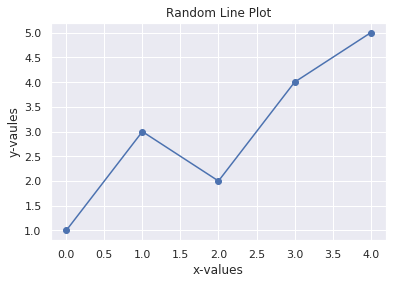

In [16]:
#Our revised line-plot now looks like
plt.plot([1, 3, 2, 4, 5], marker = 'o')
plt.xlabel('x-values')
plt.ylabel('y-vaules')
plt.title('Random Line Plot')

Let's try using this in application! Using our "revised_movies" table defined above, plot a lineplot for movie budget vs movie revenue. This seems like an obvious predictor of how profitable a movie is? Dont forget to label our axis!

**Hint**: Because we are trying to find which attribute has a strong relationship with movie revenue, we will generally want revenue will be on our y axis.

Text(0.5, 1.0, 'Movie Budget vs Revenue Lineplot')

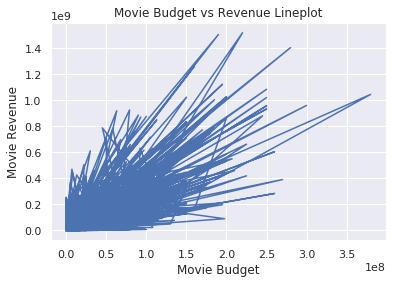

In [7]:
plt.plot(revised_movies['budget'], revised_movies['revenue'])
plt.xlabel('Movie Budget')
plt.ylabel('Movie Revenue')
plt.title('Movie Budget vs Revenue Lineplot')

Our x-axis is automatically scaled by a factor of 8 for us! As you can see, we can't make much sense with this line plots (keep in mind that we are plotting 3000 rows and connecting them all!). Lineplots usually work best with small amounts of data. Let's try to get a better picture of a shortened version of this data:

Text(0.5, 1.0, 'Shortened Budget vs Revenue Lineplot')

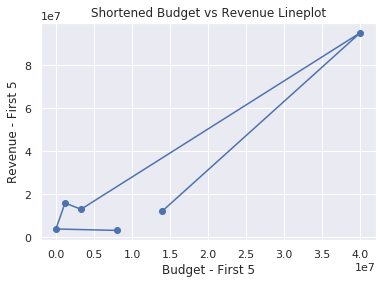

In [8]:
shortened_movies = revised_movies.loc[:5, :]
plt.plot(shortened_movies['budget'], shortened_movies['revenue'], marker = 'o')
plt.xlabel('Budget - First 5')
plt.ylabel('Revenue - First 5')
plt.title('Shortened Budget vs Revenue Lineplot')

Now say we wanted to add a second line to our lineplot. Say we wanted to find a possible relationship between a movie's release month and its popularity compared to the average popularity for all movies.

In [9]:
new_shortened_movies = revised_movies[['belongs_to_collection', 'popularity', 'release_month']]
new_shortened_movies = new_shortened_movies.groupby('release_month').agg(np.mean).set_index(np.arange(1,13))
new_shortened_movies['release_month'] = np.arange(1, 13)
nsm = new_shortened_movies
nsm['avg_popularity'] = nsm['popularity'].mean()
nsm

,popularity,release_month,avg_popularity
1,6.837152,1,8.525998
2,8.428607,2,8.525998
3,9.548313,3,8.525998
4,8.433207,4,8.525998
5,9.299071,5,8.525998
6,10.215476,6,8.525998
7,9.956781,7,8.525998
8,7.610979,8,8.525998
9,7.145905,9,8.525998
10,8.480496,10,8.525998


Text(0.5, 1.0, 'Movie Release Month and Popularity Relationship')

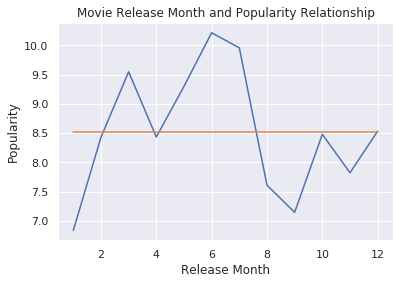

In [18]:
plt.plot(nsm['release_month'],ss nsm['popularity'], nsm['avg_popularity'])
plt.xlabel('Release Month')
plt.ylabel('Popularity')
plt.title('Movie Release Month and Popularity Relationship')

Looks like our graph shows a pretty clear trend - movies that were released in the June, July time frame were usually the most popular (above our average of 8.5), while movies released in January were the least popular! Why can this be? Maybe the measuring metrics were different in these months? Or maybe the best movies are released in the summer when kids are off school? 
Who knows! 

<a id='snslineplots'></a>
### Lineplots in Seaborn
The function to create [Lineplots in Seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html) follow a very similar to its Matplotlib counterpart in terms of its arguments. Like `plt.plot()` in Matplotlib, the arguments of `sns.lineplot()` can be either NumPy arrays or Python lists.

    sns.lineplot(x_values, y_values)
    
**Practice:** Recreate your lineplot of the relationship between a movie's budget and its revenue. Let's see if we can get a clearer picture!

Text(0.5, 1.0, 'Revenue vs Budget')

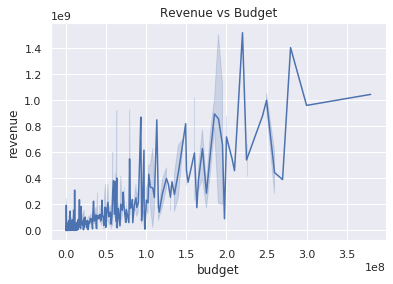

In [67]:
sns.lineplot(revised_movies['budget'], revised_movies['revenue'])
plt.title('Revenue vs Budget')

Woah! If you remember our original budget vs revneue lineplot which we graphed in Matplotlib, our lineplot went all over the place! An alternative to Matplotlib, Seaborn offers a much less noisy graph, allowing us to  observe a clearer trend in the data. 

In Seaborn, we can represent our function much more easily by specifying our dataframe so we don't have to index into every column:
    
    sns.lineplot(data=dataframe_name, x="x_values", y="y_values")
    
And it gives us the exact same graph!

Text(0.5, 1.0, 'Revenue vs Budget')

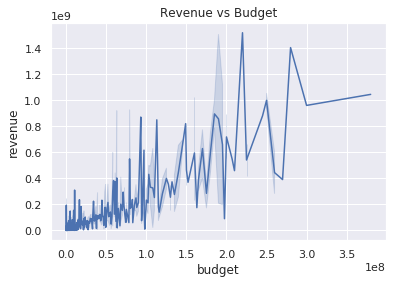

In [66]:
sns.lineplot(data = revised_movies, x = 'budget', y = 'revenue')
plt.title('Revenue vs Budget')

**Practice:** Create a lineplot of runtime vs revenue this time using this new Seaborn syntax! 

Text(0.5, 1.0, 'Revenue vs Movie Runtime')

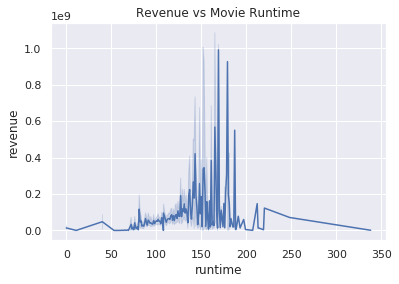

In [63]:
sns.lineplot(data = revised_movies, x = 'runtime', y = 'revenue')
plt.title('Revenue vs Movie Runtime')

Why does the lineplot we created in Seaborn have a shaded region around the main, darker area? This shaded region represents the spread or variability of the y-values at every x-value point, while the solid line represents the "middle" or average y-value per x-value. The larger the light shaded area, the greater spread or variability the y-values have at that particular given x-value. 

Take a moment to analyze the graph above. What conclusions can you draw from it?

<a id='snshue'></a>
### `Hue` in Seaborn
`sns.lineplot()` also has the optional argument `hue` which is set to a column name in your dataframe that you want to color code; generally you want to color code according to some type of categorical variable.

For example, we can color code the difference in the relationship of budget and revenue over the categorical variable `belongs_to_collection` (whether the movie belongs to a collection of movies). Now, we get an even better representation of the data: those movies that belonged to a collection generally made more revenue

**Note that the `hue` argument is not limited to only `sns.lineplot()`.** It can be used for many many other Seaborn plots too!

Text(0.5, 1.0, 'Revenue vs Budget per Collection')

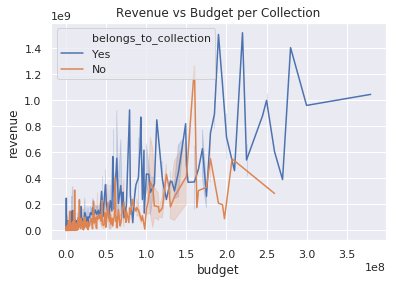

In [64]:
sns.lineplot(data=revised_movies , x='budget', y="revenue", hue='belongs_to_collection')
plt.title('Revenue vs Budget per Collection')

From this graph, it's a little hard to determine whether the 'belongs_to_collection' variable is key in highlighting differences in revenue (we'll explore this a little later!). It looks pretty small, but we have no quantitative idea how large it really is! 

But, now that we can further categorize lineplots into our categorical variables, let's see if we can find any more relationships between our data!

**Practice:** Let's test to see if there is any relationship between a movie's language and its revenue! Create a similar lineplot of the relationship between budget and revenue, however this time, based on the original language spoken in the movie, or `original_language`.

*Hint:* Because `original_language` takes on more than two values, the optional `palette` argument can be used to select a color code scheme of choice. The `palette` argument in Seaborn is set to a string that identifies a particular Seaborn color code palette. More about color palette codes can be found [here](http://jose-coto.com/styling-with-seaborn). Experiment with which palettes you like!

Text(0.5, 1.0, 'Revenue vs Budget per Language')

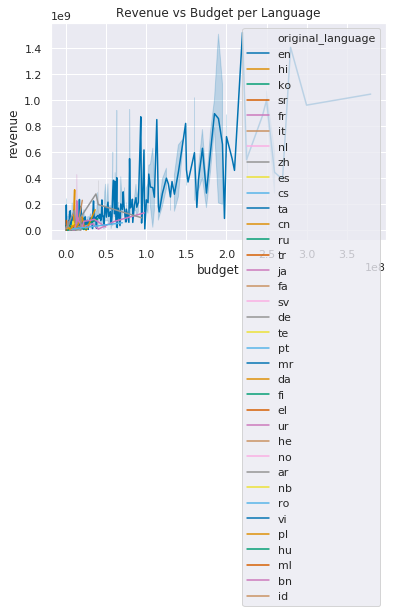

In [68]:
sns.lineplot(data = revised_movies, x = 'budget', y = 'revenue', hue = 'original_language', palette = 'colorblind')
plt.title('Revenue vs Budget per Language')

Movies in English definetly have the upper hand in their amount of revenue! But again, some other countries (speaking other languages) may not have had the budgeting power of the US (where english-language movies are typically produced), yet pulled in similar revenue (maybe due to a higher population, etc). Because this graph isn't super descriptive, let's learn at another way to measure this using a barplot!

Whew, that was a lot! Let's recap which attributes we hypothesized to be strongly correlated with revenue:
    1. Budget
    2. Belongs_to_Collection (not very descriptive)
    3. Original Language (not very descriptive)

<a id='barplots'></a>
## Bar Plots

Barplots show the relationship between a **numerical variable** and a **categorical variable** (with the categorical variable on the x-axis, vice versa). Each bar is a different category and the height of each bar is the numerical value.
- Matplotlib documentation for [bar plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)
- Seaborn documentation for [bar plots](https://seaborn.pydata.org/generated/seaborn.barplot.html)

<a id='matplotlibbarplots'></a>
### Bar Plots in Matplotlib

Matplotlib includes a function `plt.bar` which helps visualize the categorical vs numerical distribution. This is perfect for some of the variables we couldn't measure too well using lineplots. Other optional variables like `plt.figure`, `plt.xlabel`, `plt.ylabel`, `plt.title` help organize the distribution to be more convenient and understandable for your audience. The arguments taken in by plt.bar is very similar accross both lineplots and barplots in matplotlib. However, our y variable is represented as the 'height' argument in our matplotlib barplot.


Follow the implementation below to see how barplots work in matplotlib.


`plt.bar(x = (table_name)[column], height = (table_name)[column])`

Sometimes, variables can be considered either categorical or numerical depending on our data. Finding this difference is important, as it'll allow us to determine the best visualization for our data. For example, let's take the variable 'Release_year', which lists the year a movie was released. A year can be considered either a categorical variable (as multiple movies are released in any specific year), or a numerical variable (a discrete number of years). Regardless, this probably has a pretty important correlation to movie revenue (movies released later may generate more revenue due to inflation, etc). Let's try finding a relationship using 'Release_year', keeping in mind it can be considered either categorical or numerical!

Text(0.5, 1.0, 'Average Revenue for Movies Produced By Year')

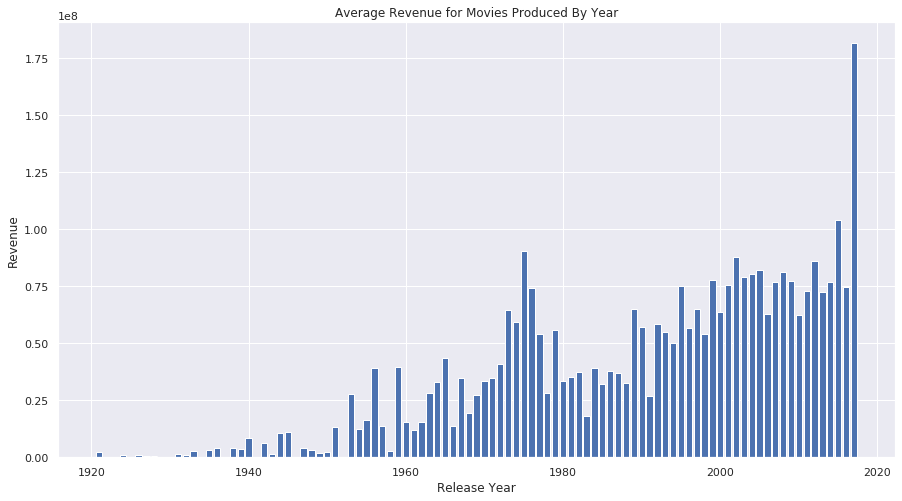

In [37]:
new_table = revised_movies.groupby('release_year').mean()
### We should find the average revenues for each year, as the count of movies released in each year varies
plt.figure(figsize=(15,8))
plt.bar(x = new.index, height = new_table['revenue']);
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Average Revenue for Movies Produced By Year")

Looks like a pretty positive correlation! Let's think of year as a numerical variable and try drawing a visualization using a lineplot in Seaborn.

Text(0.5, 1.0, 'Average Revenue per Year')

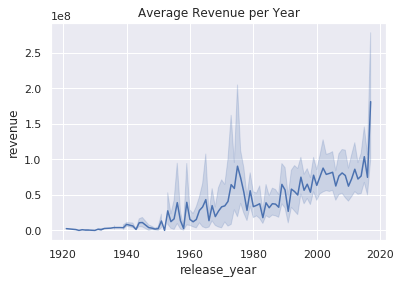

In [59]:
sns.lineplot(data = revised_movies, x = 'release_year', y = 'revenue')
plt.title('Average Revenue per Year')

What could be causing that general increasing trend we see since 1960? Keep in mind that the values on our y-axis are the average revenue, or the mean revenue of all the movies in that year. So even if more movies were produced in 2010's, this doesn't necessarily mean the difference is due to the number of movies. Maybe inflation? Or we can consider the possibility that general excitement surrounding movies has probably skyrocketed since then? But now we have reason to believe that differences in movie's release year is a moderate factor in generating revenue!

Remember how lineplots only offered a limit insight to some variable's relationship with movie revenue? Let's revisit those now that we know how to use barplots! They were:
    1. Belongs_to_Collection
    2. Original Language

Instead of using a lineplot to measure differences in the relationship between revenue and those movies that did/didn't belong to a collection, we can use a barplot to represent this relationship.

Text(0.5, 1.0, 'Movie Collections vs Revenue')

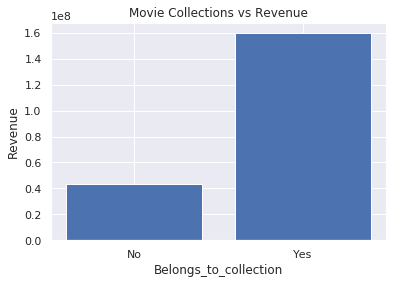

In [48]:
s = revised_movies.groupby('belongs_to_collection').mean()
### We should find the average revenues for each year, as the count of movies released in each year varies
plt.bar(x = s.index, height = s['revenue'])
plt.xlabel('Belongs_to_collection')
plt.ylabel('Revenue')
plt.title('Movie Collections vs Revenue')

Wow! Thats a huge difference in revenue! Let's inspect this more closely in Seaborn.

<a id='seabornbarplots'></a>
### Barplots in Seaborn

Barplots in seaborn are represented by the code `sns.barplot.` Our arguments of `sns.barplot` are very similar to `sns.lineplot`. However, our default y-values are NOT cumulative, but the average of the numeric columns grouped by categories. This eliminates some of the code we had to write in Matplotlib, where default values were not averaged.

1. Barplot: `sns.barplot(data = (table_name), x = (column_1), y = (column_2)`

Now that we know that movies that belong to a collection tend to generate much more revenue, let's use Seaborn to be a little more specific and break our relationship down even further by month (another categorical variable). Don't forget about our hue argument!

Text(0.5, 1.0, 'Average Revenue per Month per Collection')

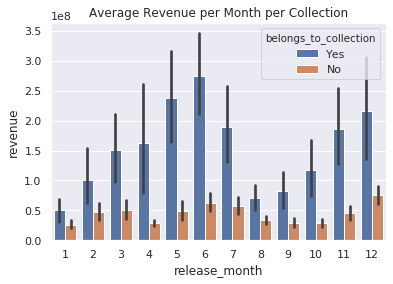

In [58]:
sns.barplot(data = revised_movies, x = 'release_month', y = 'revenue', hue = 'belongs_to_collection')
plt.title('Average Revenue per Month per Collection')

Similar to our lineplots in Seaborn, these dark looking rectangles represent the confidence interval in which the "true" average revenue pulled in by movies made in each month lie.

Woah! The minor revenue difference we observed using lineplots are showing to be huge! Whether or not the movie belongs to a series is definetly a big factor in determining revenue! But construction of this graph brings up another huge question - why was the revenue accumulated in some months so much more than others? Let's take a look.

Text(0.5, 1.0, 'Average Revenue per Month')

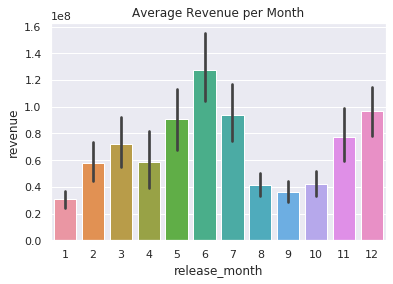

In [116]:
sns.barplot(data = revised_movies, x = 'release_month', y = 'revenue')
plt.title('Average Revenue per Month')

So as we can see from this, movies released in the month of June tend to have an abnormally high revenue as compared to those released in August, September, October, and January. 

This is really interesting because the relationship inherent in this barplot shows a very similar relationship to that between a movie's release month and popularity (which was observered earlier in our discussion of lineplots). So almost mistakenly, we've found another seemingly trivial variable which displays a unique relationship.

Okay, let's move on to our second hard-to-read variable (Language). Remember how we observed the relationship between 'original_language' of a movie and its revenue very hard to read in our implementation of a lineplot? Given that language is a categorical variable, let's try reproducing it using a barplot!

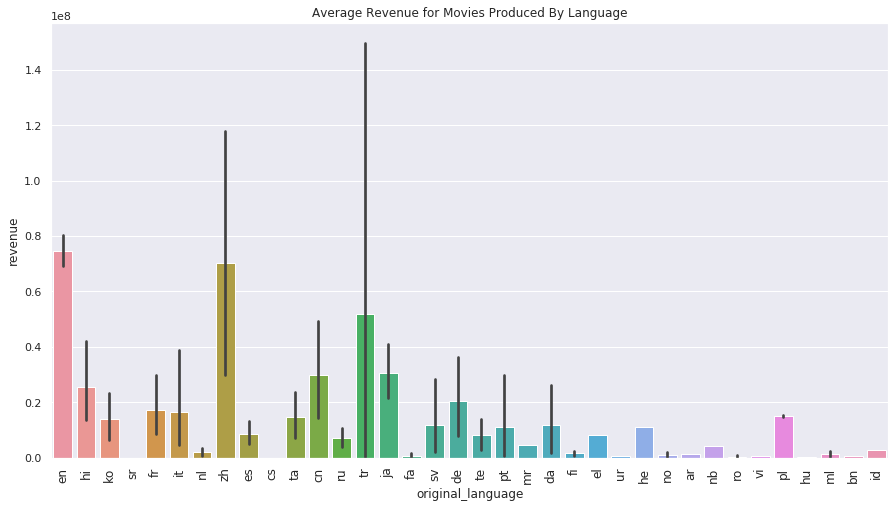

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(data = revised_movies, x = 'original_language', y = 'revenue')
loc, labels = plt.xticks()
plt.title('Average Revenue for Movies Produced By Language')
plt.xticks(fontsize=12, rotation=90)
plt.show()

Surprisingly, it's not as stark as we expected it to be. English ousts Chinese by a small margin, and even more surprisingly, Turkish is noted as one of the most revenue-generating movie languages.

This shows us that our lineplot comparing budget/revenue for different languages overpredicted how much revenue different languages generated. On the other hand, our lineplot comparing budget/revenue for movies that belonged to a collection underestimated the difference in revenue! Just another reason why a barplot is the most useful for categorical data! 

Now that we've learned how to use barplots and lineplots in Matplotlib/Seaborn, let's recap which attributes we hypothesized to have strong relationships with revenue:
    1. Budget
    2. Belongs_to_Collection
    3. Release_Year
    4. Release_Month

<a id='scatterplots'></a>
## Scatterplots

Scatterplots help visualize correlations between **two numeric variables** (especially for continuous, quantitative values).

However, unlike a lineplot, in a scatterplot there is not only one marker per x coordinate -value, and line segements do not connect each marker. This is particularily useful for larger sets of data, where connecting lines often disrupt the larger trend of the data.

<a id='scatterplotsmatplotlib'></a>
### Scatterplots in Matplotlib
Scatterplots in Matplotlib have a similar structure as do line plots, where we used `plt.plot()`. However, the function to make a scatterplot in Matplotlib is plt.scatter() which takes in the following essential arguments:

`plt.scatter(x_values, y_values)`

Similar to plt.plot(), the x_values and y_values can be either in the form of Python lists.

Practice: We think that popularity (a continuous numerical variable) seems like a pretty good indicator of total revenue. Using the movies dataframe, make a Matplotlib scatterplot of the relationship between popularity and revenue!

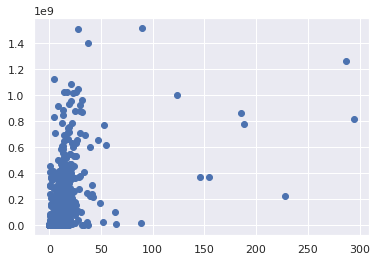

In [110]:
plt.scatter(x = revised_movies['popularity'], y = revised_movies['revenue'])

Oof! The resulting graph doesn't demonstrate much of a linear correlation, if any. As you can see popularity is a really messed up variable, and there was likely no standard measure for measuring popularity among these 3000 movies. The plotted points are also very general and hard to decipher. Look's like we'll revisit our old variable, budget vs revenue! Seaborn provides us for a way to combat many of the issues we just noticed.

<a id='scatterplotsseaborn'></a>
### Scatterplots in Seaborn
Plotting scatterplots in Seaborn has some  advantages that either Matplotlib doesn't have or can't easily accomplish.

Again, the syntax to our seaborn scatterplot is similar to Matplotlib, and its arguments are similar to the other data visualization functions that we have learned so far.

    sns.scatterplot(x_values, y_values, hue) 
    sns.scatterplot(data, x_values, y_values, hue) 
    
Both version of `sns.scatterplot()` have a `hue` argument that works as before! Additionally, Particularly, the optional `s` argument can change the size of the data points by setting it to an integer, and `plt.figure(figsize)` can change how big or small the plot is. Run the cell below, then experiment with different values of `s` and different dimensions of `plt.figure(figsize)`.

**Practice:** Using Seaborn, display a graph demonstrating the relationship between budget and revenue. Use the mentioned optional arguments to make the graph even more clearer!

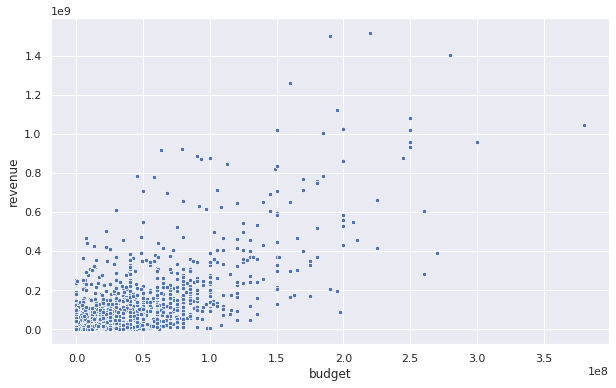

In [113]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = revised_movies, x = 'budget', y = 'revenue', s=20)

Our scatterplot somewhat resembles the somewhat linear lineplot we did a while ago! However with so many data points all over the place, it's harder to understand or draw any conclusions about relationships from this graph.

<a id='boxplots/histograms'></a>
## Boxplots/Histograms

Boxplots and histograms help describe the distribution of a **continuous numerical variable**. Both are similar in that they represent the count of units described by the data corresponding to different measures on the x-axis. In our example, they reflect the number of movies that fall within certain ranges of variables including budget, revenue, runtime, etc

Because they describe the numerical distribution of some variable, it won't be extremeley useful in understanding any relationships between variables and movie revenue, but it's good to know because they're really useful in many statistical tests.

1. Boxplot: This is a common graph to the show the distribution of our data. The 'middle' rectangle of a boxplot describes the Interquartile Range, or the middle 50% of our data. Specifically, this is from the 25th percentile of values to the 75th percentile of values. The vertical line running down the rectangle is where the median, or the 50th percentile of data lies. The two bars on the outside of the rectangle (one on each side) describe the limits of the normal data (everything outside of these are outliers).
2. Histograms: This visualization offers more flexibility than a boxplot. The Y-axis of a histogram typically represents a count, while the variable on the X-axis is what is being measured. The graph allows us to categorize the count of what's being measured on the x-axis in different intervals, known as bins. We are able to construct bins of varying lengths, and the area of these bins corresponds to the percentage of data contained between the x value ranges of the binIdeal bins should capture most/all of the range of movie revenues with step sizes which evenly divide the range into 8-12 bins.
 
Sorry if that was a mouthful! It will make much more sense in the following examples

<a id='boxplots/histograms_matplotlib'></a>
### Boxplots/Histograms in Matplotlib

Let's start off in measuring the distributon in movie runtimes. With so many movies, we would expect our runtime to be fairly standard. 

We can represent our boxplot with this code:
    `plt.boxplot((table_name)[column_name])`

**Tip**: Notice how we don't include a y-value, as we are just measuring the distribution of the values on the x

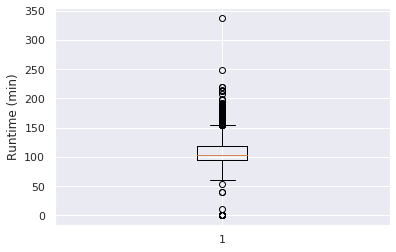

In [132]:
plt.boxplot(revised_movies['runtime'])
plt.ylabel('Runtime (min)')
plt.show()

In [131]:
median = np.median(revised_movies['runtime']) #Optional measure of "orange line", or the 50th percentile (median)
upper_quartile = np.percentile(revised_movies['runtime'], 75) #Optional measure of the top of the rectangle containing the orange line (75th percentile)
lower_quartile = np.percentile(revised_movies['runtime'], 25) #Optional measure of the bottom of the rectangle containing the orange line (25th percentile)

Looking at our boxplot, we are able to understand the distribution of movies' runtime. Looks like we have a lot more outliers with longer runtimes then shorter (movies tended to run longer on average than shorter). Additionally, we can find our quartiles through the code above (which output a certain runtime).

If we want a more convient distribution to understand how much data lies between specific quantities, or just to understand the distribution's general skewness in much simpler terms, we can use a histogram.

We can represent our histogram with this code:
1. `plt.hist((table_name)[column_name], bins = bins)` 
2. `bins = np.arange(start, end, step_size)`

Given that our values range from 0 to 350, we can use a stepsize of 50.

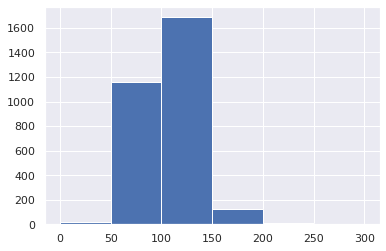

In [135]:
bins = np.arange(0, 350, 50)
plt.hist(revised_movies['runtime'], bins = bins)
plt.show()

However, if we want a more accurate distribution, we can ignore our extreme outliers (like the range from 0-50 and 200+, as they are such a minor quantity) and focus in on the range from 40 to 220, using step size of 20. Our bins will then be as followed `np.arange(40, 220, 20`)

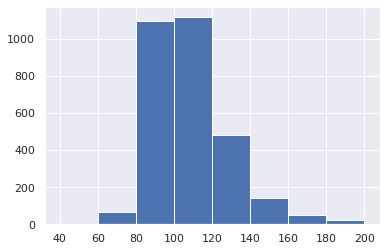

In [136]:
bins = np.arange(40, 220, 20)
plt.hist(revised_movies['runtime'], bins=bins)
plt.show()

Much better! We can get a clear understanding of our distribution (slightly skewed right), which was a little harder to get from a boxplot. Both have their advantages! Now, lets reproduce the same thing in Seaborn!

<a id='boxplots/histograms_seaborn'></a>
### Boxplots/Histograms in Seaborn

The code for a boxplot and histogram in Seaborn is as follows, respectively:
1. `sns.boxplot((table_name)[column_name])`
2. `sns.distplot((table_name)[column_name), bins=bins)` 

There are a lot of similarities in the arguments and general structure of the functions for boxplots/histograms in Seaborn and Matplotlib. We can still use the `np.arange` function to obtain our bins!

Construct distributions for a movie's popularity. Use both a boxplot and a histogram.

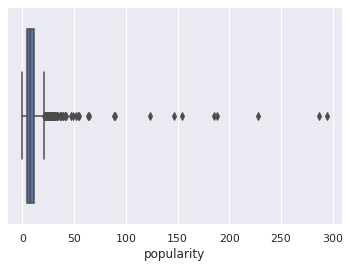

In [138]:
sns.boxplot(revised_movies['popularity'])

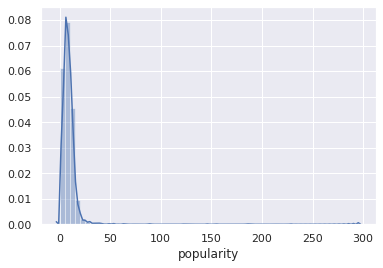

In [147]:
sns.distplot(revised_movies['popularity'], bins = np.arange(0, 55, 5))

Seaborn automatically calculates the bounds of the graph for us - the extreme outlier of nearly 300 is captured by both our histogram and boxplots. However, ignoring the outliers, we have a normal distribution with neglible skewing - the darkened curve explains just this.

Great job! You've just learned how to graph the distributions of variables and understand how to to interpret the distributions!

# Recap

So were you right? Did you correctly predict which variable(s) had strong relationships with movie revenue? Instead of manually looking through our dataset, our job is made so much easier with Matplotlib and Seaborn. What we learned today is just the basics of data visualization - there are hundreds of more data visualizations out there. But don't worry you don't need to learn them all! You'll just need to specialize in the ones that are most useful to the data you're working with, which is why understanding the data visualization tree is extremeley important. There are many technicalities of Matplotlib and Seaborn, but each have their own benefits/drawbacks in data science (I personally recommend Seaborn!), and when used in conjunction, are extremeley useful in application.  

# Thank You!